In [47]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import pandas as pd 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
corpus = ""

text_file = open(r"../text_docs/doc1.txt", 'r')
for line in text_file.readlines() : 
    corpus += line


In [65]:
# Tokenize the corpus
tokens = nltk.word_tokenize(corpus.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# Calculate word frequencies
word_freq = Counter(tokens)

# Sort words by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract ranks and frequencies for plotting
ranks, frequencies = zip(*enumerate([freq for _, freq in sorted_word_freq], 1))

In [66]:
def plot_rank_vs_freq(ranks, frequencies):
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, frequencies, marker='.', linestyle='-', color='b')
    plt.title("rank vs freq")
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()


### rank vs frequency

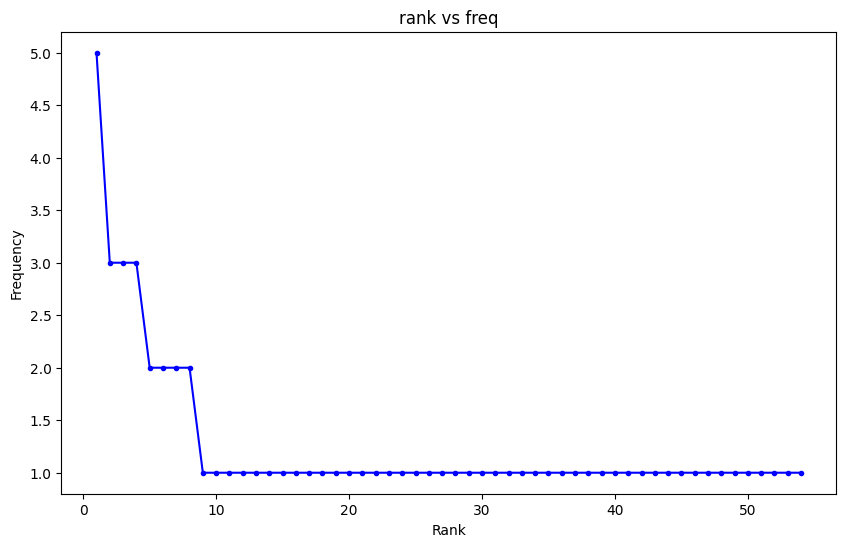

In [70]:
# Plot Zipf's Law for the given corpus
plot_rank_vs_freq(ranks, frequencies)

In [71]:
alpha, beta = 1, 2.7

comparison = []
for i in range(len(ranks)) : 
    comparison.append([ranks[i], frequencies[i], frequencies[i]*pow(ranks[i], alpha), frequencies[i]*(pow(ranks[i], alpha)+beta)])

df = pd.DataFrame(comparison, columns= ['rank', 'frequency', 'zipfs law', 'mandelbrot'])
df

,rank,frequency,zipfs law,mandelbrot
0,1,5,5,18.5
1,2,3,6,14.1
2,3,3,9,17.1
3,4,3,12,20.1
4,5,2,10,15.4
5,6,2,12,17.4
6,7,2,14,19.4
7,8,2,16,21.4
8,9,1,9,11.7
9,10,1,10,12.7


In [72]:
# mandelbrot constant has less variance 
pow(df.var(), 0.5)

rank          15.732133
frequency      0.731635
zipfs law     14.545202
mandelbrot    13.704326
dtype: float64